## Data Distribution Analysis
This notebook analyzes the distribution of data in a given dataset. It provides insights into the frequency of different values in each column.

#### 💡 About the Dataset
https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset

##### ✨ What we have?
The data consists of MRI images. The data has four classes(Labels) of images both in training and a testing set:
1. Non Demented
2. Very Mild Demented
3. Mild Demented
4. Moderate Demented

##### ✨ Augmented Data
Augmented Data is also provided for training set.<br>
Augmented data is artificially created data that is generated from the original data.
1. resizing
2. rotation
3. zooming
4. flipping
5. shifting ...
Purpose of data augmentation is to increase the diversity of the training set and improve the model's ability to generalize to new data.

##### ✨ EDA on the Dataset
1. Categorical Data Analysis: How many images are there in each class? Are they balanced or imbalanced?
2. Sample images visualization: How do the images look like in each class? How about the quality of the images?
3. Image properties analysis: What are the dimensions, color channels, and pixel intensity distributions of the images?
4. Future affecting factors: Do we need resize or normalize or class weights?

#### Step 1: Import Libraries
1. pathlib： For handling file paths.
2. PIL: For image processing.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from PIL.ImageColor import colormap

#### Step 2: Define Data Paths

In [14]:
DATA_DIR = Path('./dataset/AugmentedAlzheimerDataset') # make sure to change the path accordingly
print("Data dir exists:", DATA_DIR.exists())
print("Data Directory:", DATA_DIR)
# print the subdirectories
for label in DATA_DIR.iterdir(): # iterdir() to iterate through subdirectories, not recursive, which is labels in our case
    if label.is_dir(): # check if it's a directory
        print("Label:", label.name)

Data dir exists: True
Data Directory: dataset/AugmentedAlzheimerDataset
Label: VeryMildDemented
Label: ModerateDemented
Label: MildDemented
Label: NonDemented


#### Step 3: Iterate through the dataset and collect image data

In [6]:
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp"}
images_path = []
for img_path in DATA_DIR.rglob("*"): # rglob to search recursively，* matches all files
    if img_path.suffix.lower() in IMG_EXTS: # check if the file is an image
        images_path.append(img_path)
print("Total images found:", len(images_path))
print("Example image path:", images_path[0])

Total images found: 33984
Example image path: dataset/AugmentedAlzheimerDataset/VeryMildDemented/2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg


#### Step 4: Build DataFrame

In [37]:
rows = []
for img_path in images_path:
    file_path = str(img_path)
    file_name = img_path.name
    label = img_path.parent.name # get the parent directory name as label
    rows.append({
        "file_path": file_path,
        "file_name": file_name,
        "label": label
    }) # row is a list of dictionaries

df = pd.DataFrame(rows)
df.head()

,file_path,file_name,label
0,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg,VeryMildDemented
1,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,59bfe517-a5b4-4dd3-8e32-07fba7a77aa9.jpg,VeryMildDemented
2,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,ef1d73c2-679f-4421-b7c5-06881d487cf0.jpg,VeryMildDemented
3,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,716c42f4-f92c-40cd-9088-6254973a6665.jpg,VeryMildDemented
4,dataset/AugmentedAlzheimerDataset/VeryMildDeme...,f897246c-1263-479b-8fe0-351e98cf7c9c.jpg,VeryMildDemented


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33984 entries, 0 to 33983
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  33984 non-null  object
 1   file_name  33984 non-null  object
 2   label      33984 non-null  object
dtypes: object(3)
memory usage: 796.6+ KB


#### Step 5: Analyze Data Distribution
1. Count the number of images in each class
2. Check if the classes are balanced or imbalanced
3. Determine if any preprocessing steps are needed based on the distribution

In [39]:
label_counts = df["label"].value_counts()
label_counts

label
NonDemented         9600
VeryMildDemented    8960
MildDemented        8960
ModerateDemented    6464
Name: count, dtype: int64

##### Moderate Demented has the least number of images, which may lead to class imbalance issues during model training.

#### Step 6: Data Distribution Plots

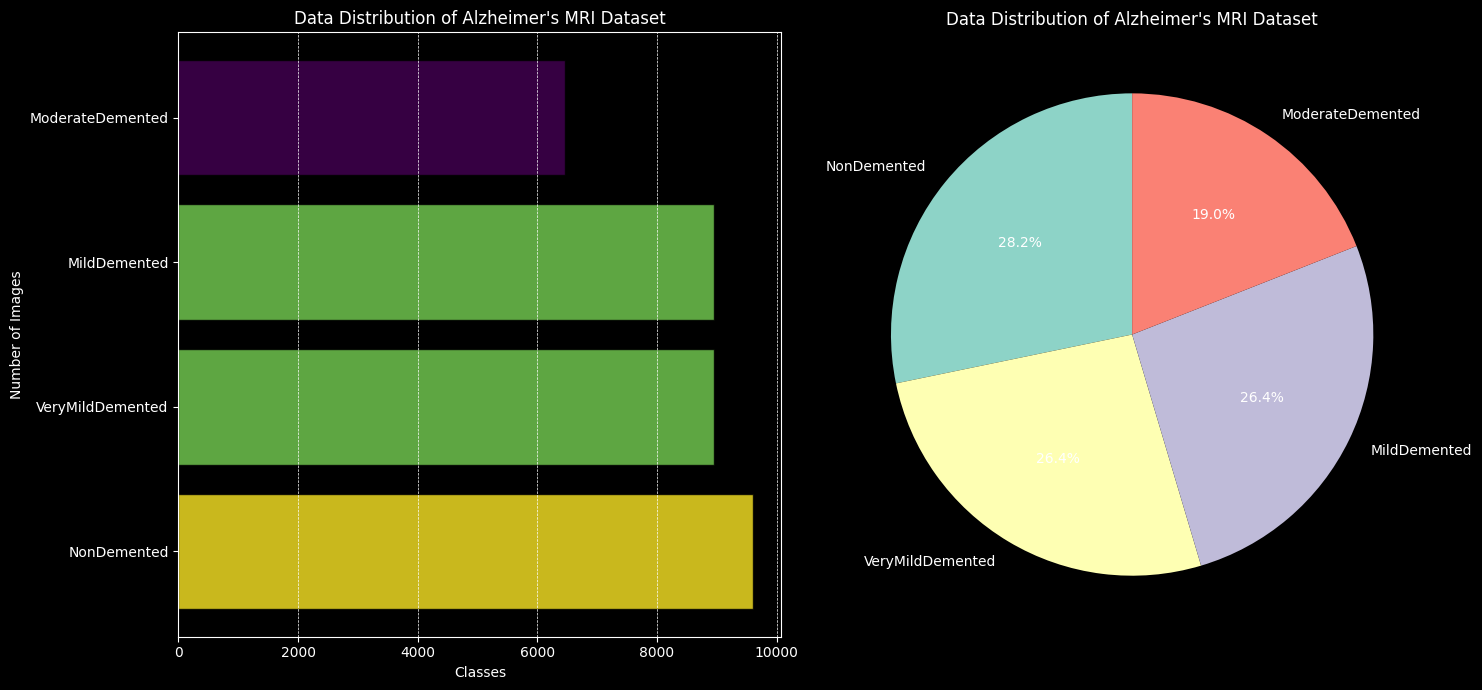

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
# Horizontal Bar Chart
axes[0].barh(label_counts.index, label_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_title("Data Distribution of Alzheimer's MRI Dataset")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Images")
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
# Pie Chart
ratio = (label_counts/label_counts.sum()) * 100
axes[1].pie(ratio.values, labels=ratio.index, autopct="%.1f%%", startangle=90)
axes[1].set_title("Data Distribution of Alzheimer's MRI Dataset")

plt.tight_layout()
plt.show()

#### Step 7: Display ramdom 16 sample images from each class

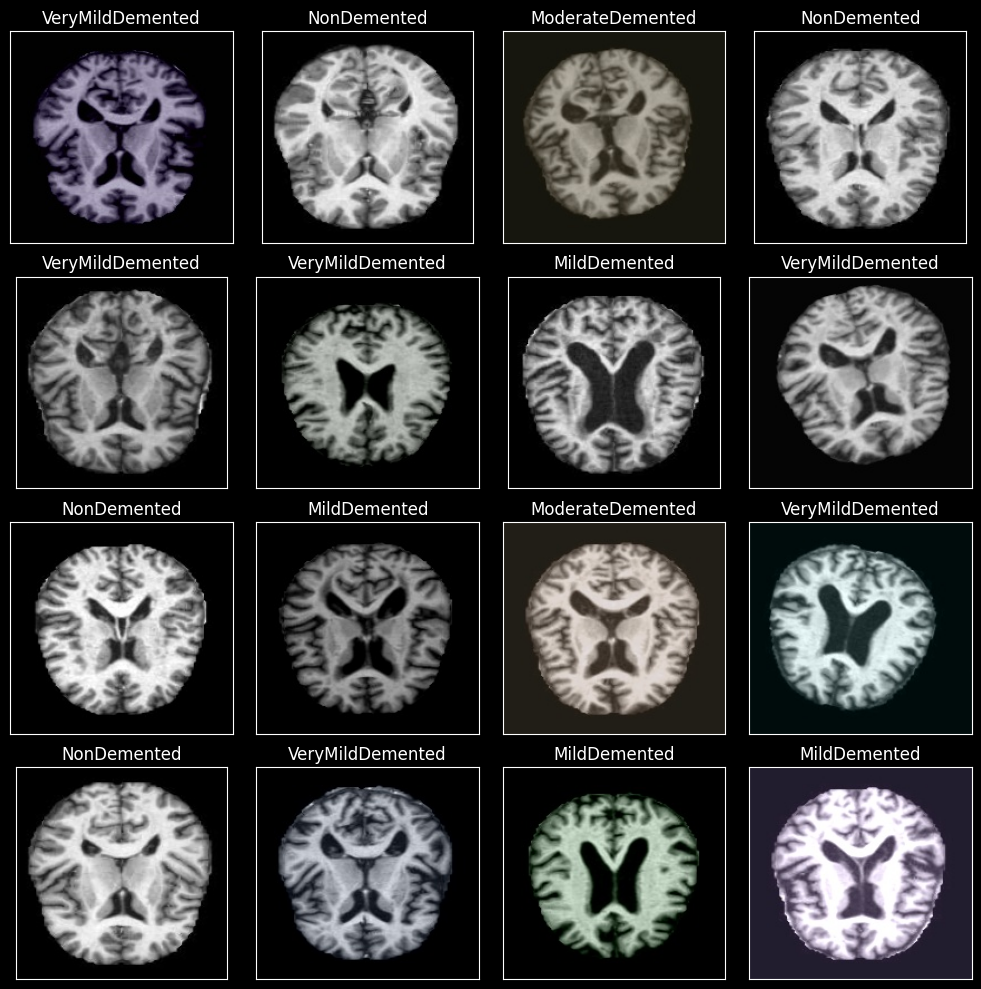

In [42]:
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["file_path"][random_index[i]]))
    ax.set_title(df["label"][random_index[i]])
plt.tight_layout()
plt.show()

In [43]:
# todo: Further analysis on image properties like dimensions, color channels, pixel intensity distributions etc.